|  |  |
| - | - |
| ![college](college.png) | Analyzing the SAT performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. I have been provided with a dataset called `schools.csv`, which is previewed below. I have been tasked with answering three key questions about New York City (NYC) public school SAT performance. | 



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in & preview the data
schools = pd.read_csv("schools.csv")
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


### Plot subject averages by borough

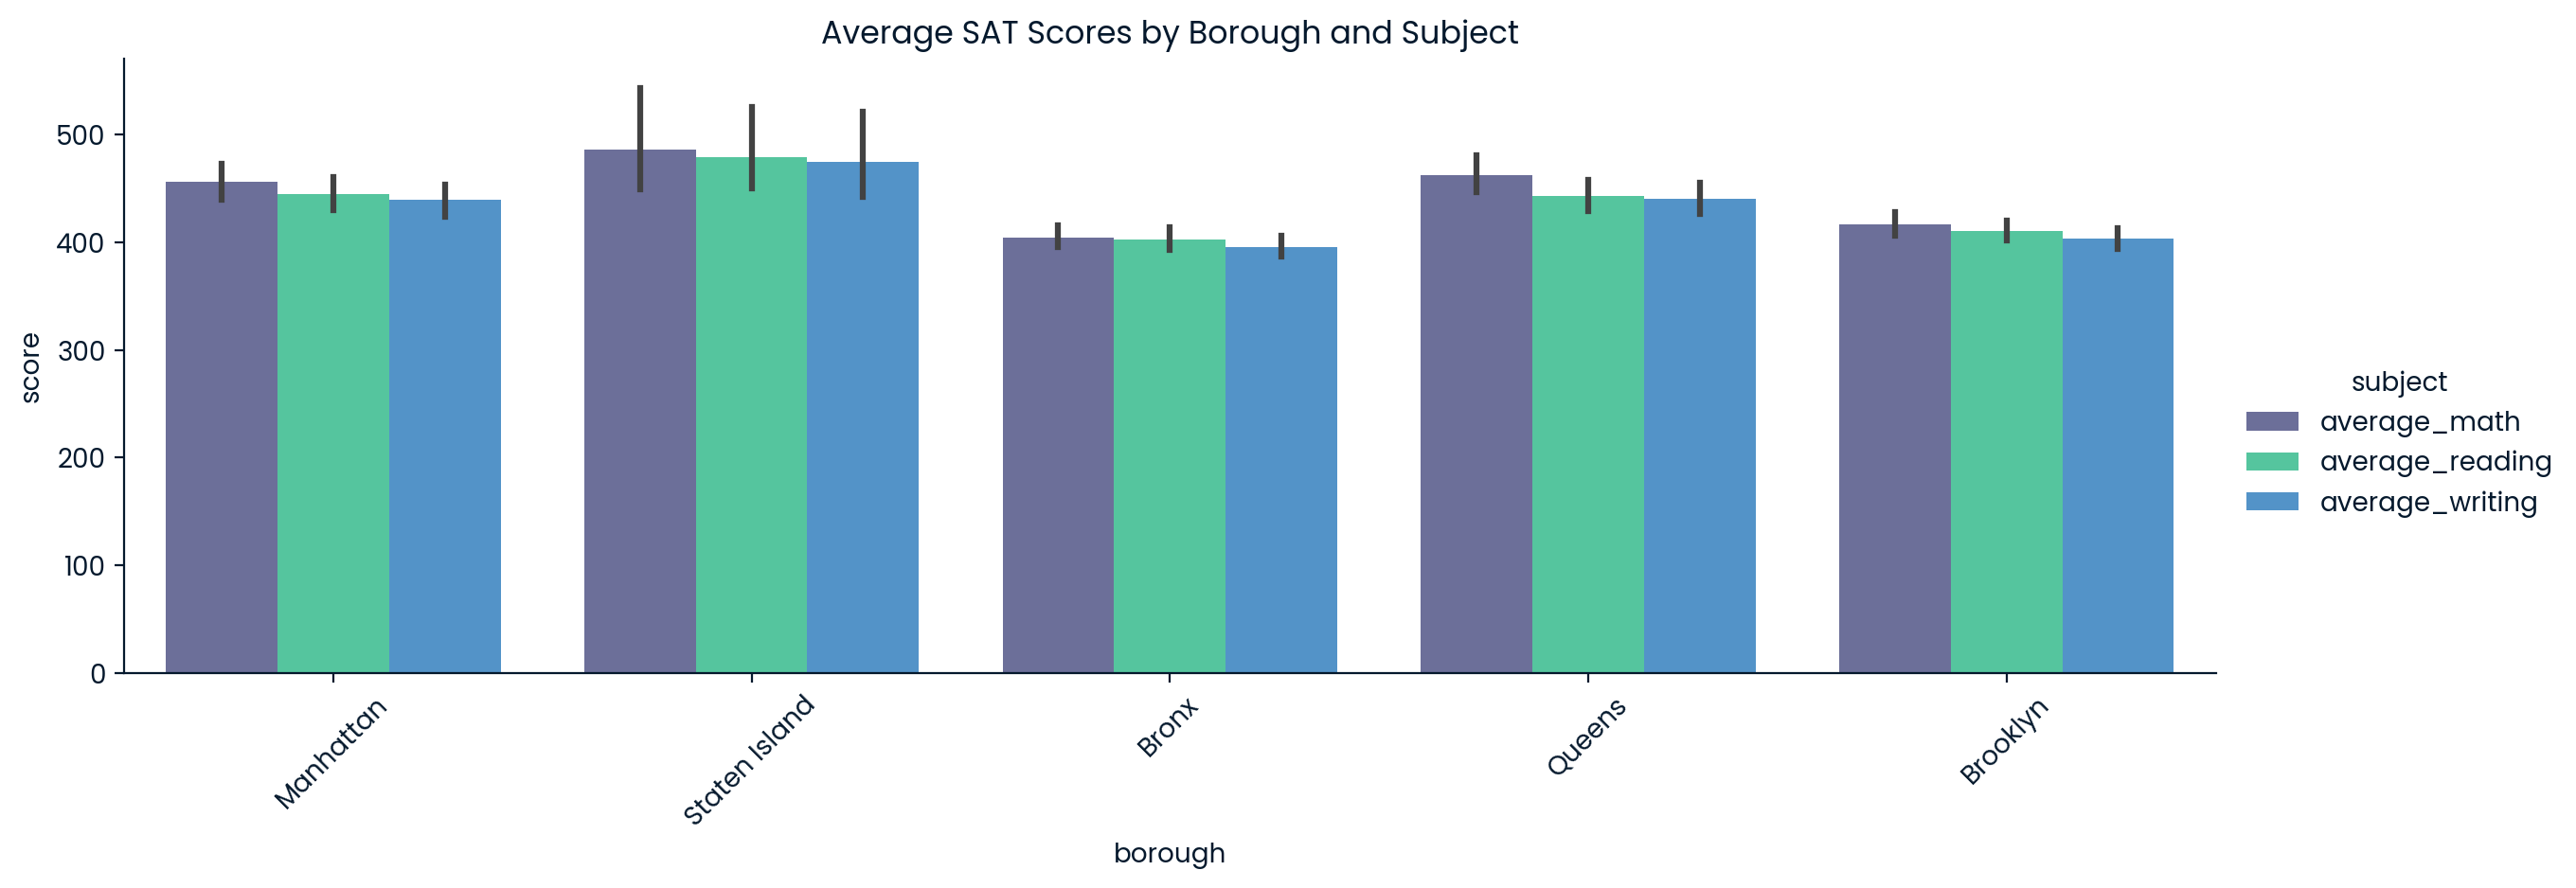

In [23]:
# unpivot tables for easier plotting
borough_breakdown = schools.melt(
    id_vars='borough',
    value_vars=['average_math', 'average_reading', 'average_writing'],
    var_name='subject',
    value_name='score'
)

# plot subject averages by borough
sns.catplot(
    data=borough_breakdown,
    kind='bar',
    x='borough',
    hue='subject',
    y='score',
    height=4,
    aspect=3
)

# annotate plot
plt.xticks(rotation=45)
plt.title("Average SAT Scores by Borough and Subject")
plt.show()

### Which NYC schools have the best math results?

The best math results are at least 80% of the *maximum possible score of 800* for math.

In [24]:
# to get started, I will store the minimum best score as a variable
min_best_mscore = 0.80 * 800 

# create a dataframe for the best math schools (subsetting school name and avg math)
math_average = schools[['school_name', 'average_math']].sort_values(by='average_math', ascending=False)

# select only schools with an average equal or greated to 80% of max score
best_math_schools = math_average[math_average['average_math'] >= min_best_mscore]

# review output
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


### What are the top 10 performing schools based on the combined SAT scores?

We need to add a new column account for the combined scores.

In [25]:
# shortening schools variable, combining column values by individual row
s = schools
total_SAT = s['total_score'] = s[['average_math', 'average_reading', 'average_writing']].sum(axis=1)

# adding the above as a column
s['total_SAT'] = total_SAT

#outputting the top 10 by descending value
top_10_schools = s[['school_name', 'total_SAT']].sort_values(by='total_SAT', ascending=False).head(10)

top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


### Which single borough has the largest standard deviation in the combined SAT score?

We are looking at the central tendency for a single borough.

_(Not sure what a 'borough' actually is, but it will be fine...)_

In [26]:
# selecting columns and their appropriate values with aggregation 
largest_std_dev = s.groupby('borough')['total_SAT'].agg(
    num_schools='count',
    average_SAT='mean',
    std_SAT='std',
).sort_values(by='std_SAT',ascending=False).round(2).head(1) # rounding the values by two decimal places

largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29


### Correlations between SAT subjects

In [32]:
# subset average columns
scores = schools[['average_math', 'average_reading', 'average_writing']]

# use .corr() to get Pearson's correlation coefficients between them
scores_corr = scores.corr()

scores_corr

,average_math,average_reading,average_writing
average_math,1.000000,0.928239,0.934155
average_reading,0.928239,1.000000,0.985439
average_writing,0.934155,0.985439,1.000000


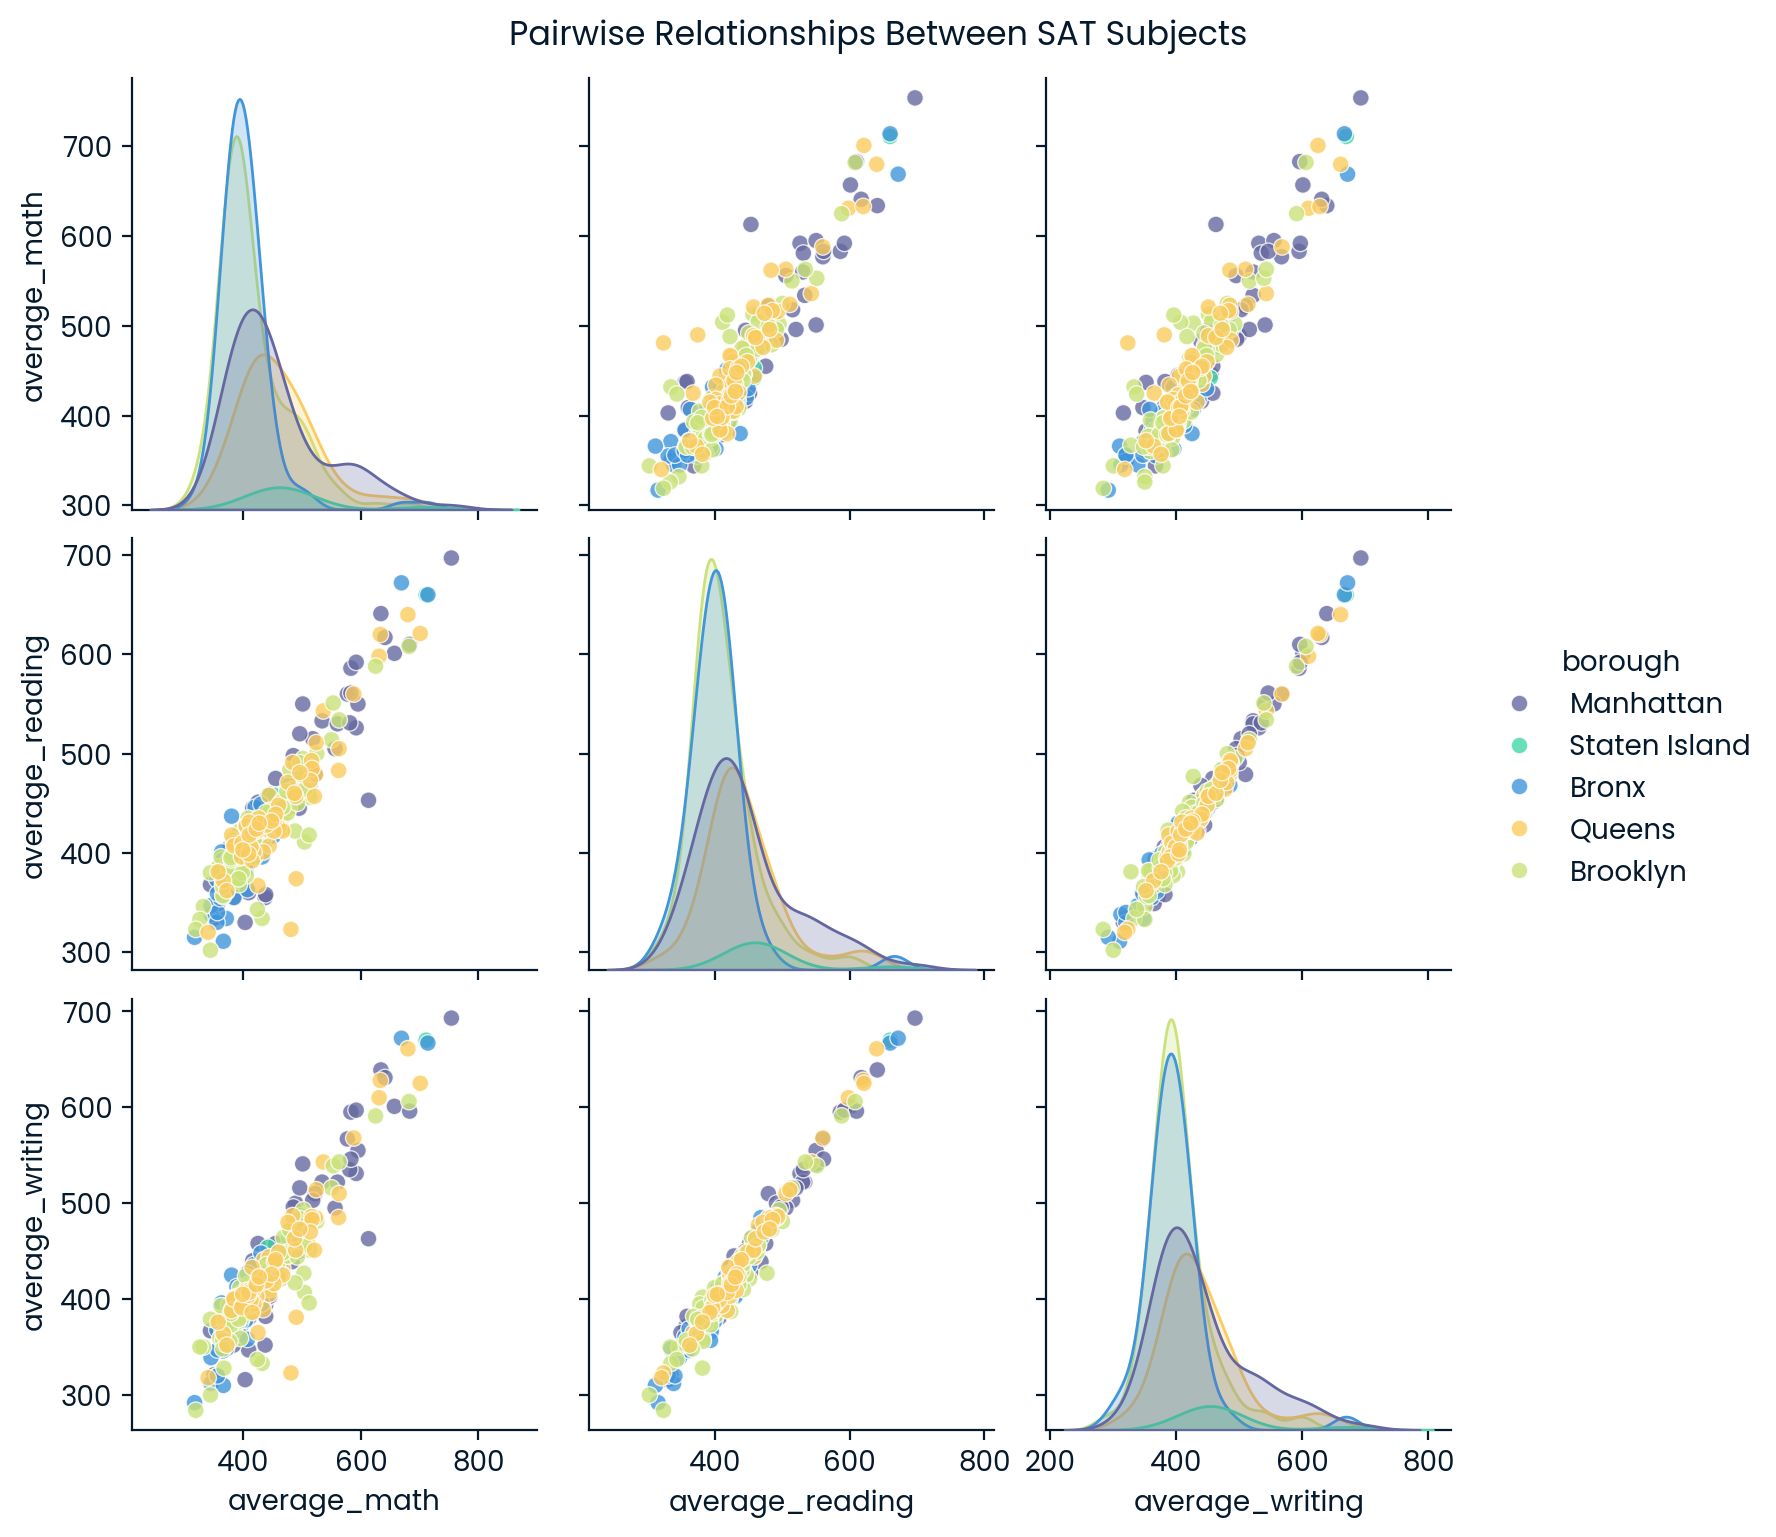

In [57]:
# visualise the correlations (and distributions by borough)
sns.pairplot(
    data=schools,
    vars=['average_math', 'average_reading', 'average_writing'],
    hue='borough',
    plot_kws={'alpha': 0.8}
)
plt.suptitle("Pairwise Relationships Between SAT Subjects", y=1.02)
plt.show()